In [3]:
%matplotlib notebook
# import d2lzh as d2l
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
! ls -al models/caffemodel
! pwd

total 44512
drwxr-xr-x 2 root root     4096 Nov  3 14:59 .
drwxr-xr-x 3 root root     4096 Nov  3 14:49 ..
-rw-r--r-- 1 root root 45535232 Oct 12 06:50 caffe.caffemodel
-rw-r--r-- 1 root root    20754 Oct 12 06:50 deploy.prototxt
-rw-r--r-- 1 root root     6148 Nov  3 15:01 .DS_Store
-rw-r--r-- 1 root root       73 Oct 12 06:50 label-map.txt
/


In [6]:
import os
import caffe
caffe.set_mode_cpu()
import numpy as np
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
deploy = os.path.join(BASE_DIR, 'models/caffemodel/deploy.prototxt')  # deploy文件
caffe_model = os.path.join(BASE_DIR, 'models/caffemodel/caffe.caffemodel')  # 训练好的 caffemodel
labels_filename = os.path.join(BASE_DIR, 'models/caffemodel/label-map.txt')  # 类别名称文件，将数字标签转换回类别名称
LABELS = np.loadtxt(labels_filename, str, delimiter='\n')   #读取类别名称文件
CAFFENET = caffe.Net(deploy, caffe_model, caffe.TEST)  # 加载model和network

# 图片预处理设置
Transformer = caffe.io.Transformer({'data': CAFFENET.blobs['data'].data.shape})  # 设定图片的shape格式(1,3,28,28)
Transformer.set_transpose('data', (2, 0, 1))  # 改变维度的顺序，由原始图片(28,28,3)变为(3,28,28)
Transformer.set_mean('data', np.array([104, 117, 123]))  # 减去均值，前面训练模型时没有减均值，这儿就不用
Transformer.set_raw_scale('data', 255)  # 缩放到【0，255】之间
Transformer.set_channel_swap('data', (2, 1, 0))  # 交换通道，将图片由RGB变为BGR


In [9]:
! rm -rf TEST/.DS_Store

In [10]:
TEST_IMG_PATH = 'TEST'


79RG------


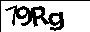

NGEF------


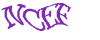

YQ8V------


GGFK------


QNKKD-----


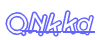

N8SE------


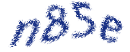

In [12]:
image_files_list = os.listdir(TEST_IMG_PATH)
for image_file_name in image_files_list:
    im = caffe.io.load_image(os.path.join(TEST_IMG_PATH,image_file_name))  # 加载图片
    ### detail
    CAFFENET.blobs['data'].data[...] = Transformer.preprocess('data', im)  # 执行上面设置的图片预处理操作，并将图片载入到blob中
    ### predict
    CAFFENET.forward()
    Predisct = ""
    pre_st = 0
    for i in range(1, 11):
        # print('---------------------\n',net.blobs['fc1000'+str(i)].data)
        prob = CAFFENET.blobs['fc1000' + str(i)].data[0].flatten()  # 取出最后一层（Softmax）属于某个类别的概率值，并打印
        # print (prob)
        order = prob.argsort()[-1]  # 将概率值排序，取出最大值所在的序号
        # print(order)
        Predisct+=LABELS[order]  # 将该序号转换成对应的类别名称，并打印
    image = Image.open(os.path.join(TEST_IMG_PATH,image_file_name))
    print(Predisct)
    display(image)